In [126]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
#Here's how to understand the dataset. For sex, 1=Male, and 2=Female. If someone is positive for a comorbidity you will see a 1 for yes, or 0 for no. If outcomes that are equal to 1 mean the individual died. 

In [127]:
comorbidity_df = pd.read_csv("../ARCHIVE/comorbidity.csv")

In [128]:
comorbidity_df.shape

(1143, 16)

In [129]:
comorbidity_df.columns

Index(['sex', 'age', 'hypertension', 'cardiovascular', 'cerebrovascular',
       'lung', 'malignancy', 'diabetes', 'liver', 'kidney',
       'neurodegeneretive', 'infectious', 'surgical', 'copd', 'asthma',
       'outcomes'],
      dtype='object')

In [130]:
comorbidity_df.head(20)

,sex,age,hypertension,cardiovascular,cerebrovascular,lung,malignancy,diabetes,liver,kidney,neurodegeneretive,infectious,surgical,copd,asthma,outcomes
0,1,85.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,63.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,62.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2,84.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2,77.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,1,42.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,1,51.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,2,51.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,1,85.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9,1,51.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [131]:
comorbidity_df.iloc[300:500]

,sex,age,hypertension,cardiovascular,cerebrovascular,lung,malignancy,diabetes,liver,kidney,neurodegeneretive,infectious,surgical,copd,asthma,outcomes
300,1,55.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
301,1,61.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
302,2,51.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
303,1,57.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
304,2,44.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1,54.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
496,1,54.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
497,1,71.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
498,2,28.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [132]:
total_co_count = comorbidity_df[['hypertension', 'cardiovascular', 'cerebrovascular',
       'lung', 'malignancy', 'diabetes', 'liver', 'kidney',
       'neurodegeneretive', 'infectious', 'surgical', 'copd', 'asthma']].sum()
print(total_co_count)

hypertension         100
cardiovascular        21
cerebrovascular        4
lung                   9
malignancy             9
diabetes              80
liver                  2
kidney                20
neurodegeneretive      2
infectious             2
surgical               3
copd                   8
asthma                10
dtype: int64


In [133]:
Cols = ['hypertension', 'cardiovascular', 'cerebrovascular', 'lung', 'malignancy', 
        'diabetes', 'liver', 'kidney', 'neurodegeneretive', 'infectious', 
        'surgical', 'copd', 'asthma']
total_co_deaths = comorbidity_df[(comorbidity_df[Cols].eq(1).any(axis=1)) & (comorbidity_df['outcomes'] == 1)]
total_co_deaths.sum()

sex                   130.0
age                  7046.0
hypertension           74.0
cardiovascular         16.0
cerebrovascular         4.0
lung                    6.0
malignancy              4.0
diabetes               57.0
liver                   2.0
kidney                 18.0
neurodegeneretive       2.0
infectious              0.0
surgical                1.0
copd                    6.0
asthma                  5.0
outcomes              101.0
dtype: float64

In [134]:
Total_rows_with_co = comorbidity_df[(comorbidity_df[Cols].eq(1).any(axis=1)) & (comorbidity_df['outcomes'].isin([0, 1]))]
Total_rows_with_co.count()

sex                  147
age                  147
hypertension         147
cardiovascular       147
cerebrovascular      147
lung                 147
malignancy           147
diabetes             147
liver                147
kidney               147
neurodegeneretive    147
infectious           147
surgical             147
copd                 147
asthma               147
outcomes             147
dtype: int64

In [135]:
#The percent of death for someone with a comorbidity is 68% 

In [136]:
#Hypertension is the highest tracked comorbidity. Let's see how many people had other conditions along with hypertension. Thte total amount of hypertension is 100
Hyper_Relationship = comorbidity_df[comorbidity_df['hypertension'] >= 1].sort_values(by='hypertension', ascending=False).sum()

In [137]:
print(Hyper_Relationship)

sex                   132.0
age                  6948.0
hypertension          100.0
cardiovascular         16.0
cerebrovascular         3.0
lung                    6.0
malignancy              5.0
diabetes               59.0
liver                   0.0
kidney                 15.0
neurodegeneretive       1.0
infectious              0.0
surgical                3.0
copd                    1.0
asthma                  4.0
outcomes               74.0
dtype: float64


In [138]:
#Lets look at how many 85 year old outcomes we have in this dataset
outcome_comorbility_relationship_85_years = comorbidity_df[comorbidity_df['age'] == 85].sort_values(by='age', ascending=False).sum()
print(outcome_comorbility_relationship_85_years)

sex                    61.0
age                  3315.0
hypertension            2.0
cardiovascular          0.0
cerebrovascular         0.0
lung                    0.0
malignancy              0.0
diabetes                2.0
liver                   0.0
kidney                  0.0
neurodegeneretive       0.0
infectious              0.0
surgical                0.0
copd                    0.0
asthma                  0.0
outcomes               35.0
dtype: float64


In [139]:
#Now lets see total poulation of 85 year olds
age_85_rows = comorbidity_df[comorbidity_df['age'] ==85]
age_85_rows

,sex,age,hypertension,cardiovascular,cerebrovascular,lung,malignancy,diabetes,liver,kidney,neurodegeneretive,infectious,surgical,copd,asthma,outcomes
0,1,85.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,1,85.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
15,1,85.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
20,1,85.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
22,1,85.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
29,2,85.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
34,2,85.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
46,1,85.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
47,2,85.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
50,1,85.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [140]:
#let's see how many people in each age group had comorbidities >=0 and had an outcome of 1
Comorbidity_ages = comorbidity_df.columns[2:14]
co_outcome_true = comorbidity_df[
    (comorbidity_df['outcomes'] == 1) &
    (comorbidity_df[Comorbidity_ages].sum(axis=1) >= 0)
]
age_grouped = co_outcome_true.groupby('age').size()

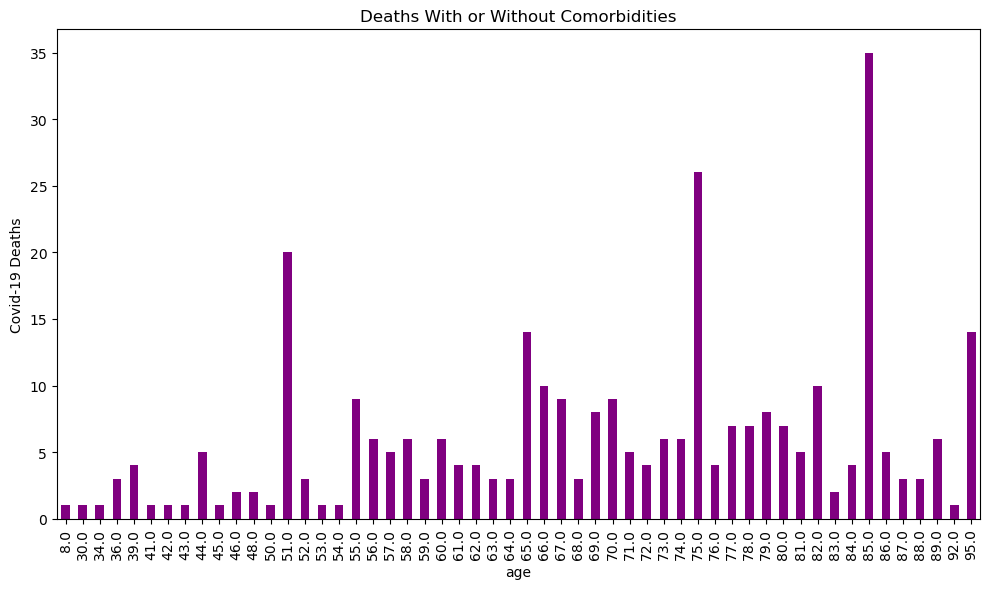

In [141]:
plt.figure(figsize=(10,6))
age_grouped.plot(kind='bar', color='purple')
plt.xlabel('age')
plt.ylabel('Covid-19 Deaths')
plt.title('Deaths With or Without Comorbidities')
plt.tight_layout()
plt.show()

In [142]:
positive_outcomes = comorbidity_df.columns[2:14]
co_outcome_true = comorbidity_df[
    (comorbidity_df['outcomes'] == 1) &
    (comorbidity_df[positive_outcomes].sum(axis=1) == 0)
]
age_grouped = co_outcome_true.groupby('age').size()

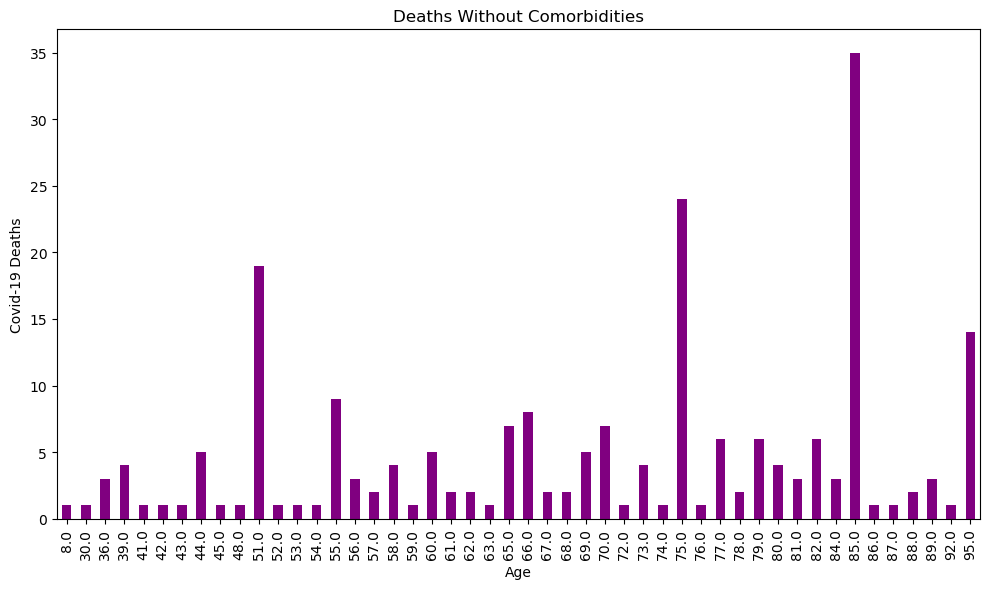

In [143]:
plt.figure(figsize=(10,6))
age_grouped.plot(kind='bar', color='purple')
plt.xlabel('Age')
plt.ylabel('Covid-19 Deaths')
plt.title('Deaths Without Comorbidities')
plt.tight_layout()
plt.show()

In [144]:
#total outcomes
outcome_df = comorbidity_df['outcomes']
outcome_df.sum()

319

In [145]:
#outcomes by age
age_outcome = comorbidity_df[['age','outcomes']]
age_outcome.value_counts(ascending=False) 

age   outcomes
50.0  0           81
51.0  0           72
85.0  1           35
55.0  0           27
75.0  1           26
                  ..
45.0  1            1
50.0  1            1
53.0  1            1
54.0  1            1
98.0  0            1
Name: count, Length: 139, dtype: int64

In [146]:
#plug in any age to see outcomes and total population per age
age_outcome = comorbidity_df[['age','outcomes']]
age_outcome[(age_outcome['age'] == 85)] 

,age,outcomes
0,85.0,1
8,85.0,1
15,85.0,1
20,85.0,1
22,85.0,1
29,85.0,1
34,85.0,1
46,85.0,1
47,85.0,1
50,85.0,1


In [147]:
#outcomes by age range 70 and up
positive_outcomes_over_70 = comorbidity_df[(comorbidity_df['age'] >=70) & (comorbidity_df['outcomes'] ==1)][['age', 'outcomes']]
print(positive_outcomes_over_70)

      age  outcomes
0    85.0         1
3    84.0         1
4    77.0         1
8    85.0         1
15   85.0         1
..    ...       ...
951  95.0         1
952  75.0         1
953  75.0         1
954  75.0         1
956  85.0         1

[177 rows x 2 columns]


In [148]:
#outcomes 50 and up. Differnece to see 50-69. [DIFFERENCE is 119]
positive_outcomes_over_50 = comorbidity_df[(comorbidity_df['age'] >= 50) & (comorbidity_df['outcomes'] ==1)][['age', 'outcomes']]
print(positive_outcomes_over_50)

      age  outcomes
0    85.0         1
1    63.0         1
2    62.0         1
3    84.0         1
4    77.0         1
..    ...       ...
952  75.0         1
953  75.0         1
954  75.0         1
955  55.0         1
956  85.0         1

[296 rows x 2 columns]


In [149]:
#outcomes below 50
positive_outcomes_below_50 = comorbidity_df[(comorbidity_df['age'] < 50) & (comorbidity_df['outcomes'] ==1)][['age', 'outcomes']]
positive_outcomes_below_50.count()

age         23
outcomes    23
dtype: int64

In [150]:
#Sex outcomes (men)
sex_outcomes_M = comorbidity_df[(comorbidity_df['sex'] ==1) & (comorbidity_df['outcomes'] ==1)][['sex','outcomes']]
print(sex_outcomes_M)

     sex  outcomes
0      1         1
1      1         1
2      1         1
5      1         1
6      1         1
..   ...       ...
943    1         1
945    1         1
952    1         1
953    1         1
955    1         1

[208 rows x 2 columns]


In [151]:
#Sex outcomes (women)
sex_outcomes_F = comorbidity_df[(comorbidity_df['sex'] ==2) & (comorbidity_df['outcomes'] ==1)][['sex','outcomes']]
print(sex_outcomes_F)

     sex  outcomes
3      2         1
4      2         1
7      2         1
17     2         1
19     2         1
..   ...       ...
949    2         1
950    2         1
951    2         1
954    2         1
956    2         1

[111 rows x 2 columns]


In [152]:
#Men make up 60% of rows, and females make up 40% of the rows. Men died 8% more than their proporttion of the sample population, where females died 13% less than their proportion of the population. 

In [153]:
#I plug in different ages to this code to find the differences bewteen sexs at any given age.
sex_popluation_by_age = comorbidity_df[(comorbidity_df['sex'] ==2) & (comorbidity_df['age'] ==51)][['sex','age']]
sex_popluation_by_age

,sex,age
7,2,51.0
237,2,51.0
259,2,51.0
302,2,51.0
321,2,51.0
385,2,51.0
402,2,51.0
516,2,51.0
636,2,51.0
637,2,51.0


In [154]:
#Outcomes with hypertension M
men_hyper_outcomes =comorbidity_df[(comorbidity_df['sex'] ==1) & (comorbidity_df['outcomes'] ==1) & (comorbidity_df['hypertension'] ==1)][['sex','outcomes','hypertension']] 
men_hyper_outcomes.count()

sex             50
outcomes        50
hypertension    50
dtype: int64

In [155]:
#Outcomes with hypertension F
women_hyper_outcomes =comorbidity_df[(comorbidity_df['sex'] ==2) & (comorbidity_df['outcomes'] ==1) & (comorbidity_df['hypertension'] ==1)][['sex','outcomes','hypertension']] 
women_hyper_outcomes.count()

sex             24
outcomes        24
hypertension    24
dtype: int64

In [156]:
#Outcomes with diabetes M
men_db_outcomes =comorbidity_df[(comorbidity_df['sex'] ==1) & (comorbidity_df['outcomes'] ==1) & (comorbidity_df['diabetes'] ==1)][['sex','outcomes','diabetes']] 
men_db_outcomes.count()

sex         43
outcomes    43
diabetes    43
dtype: int64

In [157]:
#Outcomes with diabetes F
women_db_outcomes =comorbidity_df[(comorbidity_df['sex'] ==2) & (comorbidity_df['outcomes'] ==1) & (comorbidity_df['diabetes'] ==1)][['sex','outcomes','diabetes']] 
women_db_outcomes.count()

sex         14
outcomes    14
diabetes    14
dtype: int64

In [158]:
#Outcomes with cardiovascular M
men_cv_outcomes =comorbidity_df[(comorbidity_df['sex'] ==1) & (comorbidity_df['outcomes'] ==1) & (comorbidity_df['cardiovascular'] ==1)][['sex','outcomes','cardiovascular']] 
men_cv_outcomes.count()

sex               13
outcomes          13
cardiovascular    13
dtype: int64

In [159]:
#Outcomes with cardiovascular F
women_cv_outcomes =comorbidity_df[(comorbidity_df['sex'] ==1) & (comorbidity_df['outcomes'] ==1) & (comorbidity_df['cardiovascular'] ==1)][['sex','outcomes','cardiovascular']] 
women_cv_outcomes.count()

sex               13
outcomes          13
cardiovascular    13
dtype: int64

In [160]:
multi_co = ((comorbidity_df[['hypertension', 'diabetes', 'cardiovascular', 'outcomes']] ==1).all(axis=1)).sum()
print(multi_co)

7


In [161]:
#The next 4 cells are total deaths with a certain comorbility
total_hyper = comorbidity_df[(comorbidity_df['hypertension'] ==1) & (comorbidity_df['outcomes'] ==1)][['hypertension', 'outcomes']]
total_hyper.count()

hypertension    74
outcomes        74
dtype: int64

In [162]:
total_diabetes = comorbidity_df[(comorbidity_df['diabetes'] ==1) & (comorbidity_df['outcomes'] ==1)][['diabetes', 'outcomes']]
total_diabetes.count()

diabetes    57
outcomes    57
dtype: int64

In [163]:
total_copd = comorbidity_df[(comorbidity_df['kidney'] ==1) & (comorbidity_df['outcomes'] ==1)][['copd', 'outcomes']]
total_copd.count()

copd        18
outcomes    18
dtype: int64

In [164]:
total_cv = comorbidity_df[(comorbidity_df['cardiovascular'] ==1) & (comorbidity_df['outcomes'] ==1)][['cardiovascular', 'outcomes']]
total_cv.count()

cardiovascular    16
outcomes          16
dtype: int64

In [165]:
comorbidity_df.dropna()

,sex,age,hypertension,cardiovascular,cerebrovascular,lung,malignancy,diabetes,liver,kidney,neurodegeneretive,infectious,surgical,copd,asthma,outcomes
0,1,85.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,63.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,62.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2,84.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2,77.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,2,25.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1139,1,63.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1140,1,30.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1141,2,60.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [166]:
age_co_outcomes = comorbidity_df[
    (comorbidity_df['outcomes'] ==1) &
    (comorbidity_df[['hypertension','diabetes','cardiovascular', 'kidney', 'asthma','lung', 'malignancy', 'copd', 'cerebrovascular', 'surgical', 'infectious', 'liver', 'neurodegeneretive']].eq(1).any(axis=1))
]

age_co_outcomes = age_co_outcomes.sort_values(by='age', ascending=False)
age_co_outcomes.sum()

sex                   130.0
age                  7046.0
hypertension           74.0
cardiovascular         16.0
cerebrovascular         4.0
lung                    6.0
malignancy              4.0
diabetes               57.0
liver                   2.0
kidney                 18.0
neurodegeneretive       2.0
infectious              0.0
surgical                1.0
copd                    6.0
asthma                  5.0
outcomes              101.0
dtype: float64

In [167]:
#Number of people who died over the age of 50
healthy_over_50_outcomes = comorbidity_df[
    (comorbidity_df['outcomes'] ==1) &
    (comorbidity_df['age'] >= 50) &
    (comorbidity_df[['hypertension','diabetes','cardiovascular', 'kidney', 'asthma','lung', 'malignancy', 'copd', 'cerebrovascular', 'surgical', 'infectious', 'liver', 'neurodegeneretive']].eq(0).any(axis=1))
]

healthy_over_50_outcomes = healthy_over_50_outcomes.sort_values(by='age', ascending=False)
healthy_over_50_outcomes.sum()


sex                    404.0
age                  21435.0
hypertension            72.0
cardiovascular          16.0
cerebrovascular          3.0
lung                     6.0
malignancy               4.0
diabetes                55.0
liver                    2.0
kidney                  17.0
neurodegeneretive        2.0
infectious               0.0
surgical                 1.0
copd                     6.0
asthma                   5.0
outcomes               296.0
dtype: float64

In [168]:
healthy_over_50_outcomes[healthy_over_50_outcomes['age'] >= 50]

,sex,age,hypertension,cardiovascular,cerebrovascular,lung,malignancy,diabetes,liver,kidney,neurodegeneretive,infectious,surgical,copd,asthma,outcomes
868,2,95.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
951,2,95.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
63,2,95.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
948,2,95.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
38,2,95.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,1,51.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
13,1,51.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
26,1,51.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
12,1,51.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [169]:
print(age_co_outcomes)

     sex   age  hypertension  cardiovascular  cerebrovascular  lung  \
114    1  89.0             1               0                1     0   
111    1  89.0             1               1                0     0   
210    1  89.0             0               0                0     0   
135    2  88.0             1               0                0     0   
91     1  87.0             0               0                0     0   
..   ...   ...           ...             ...              ...   ...   
184    1  50.0             0               0                0     0   
110    2  48.0             0               0                1     0   
165    1  46.0             1               0                0     0   
167    1  46.0             1               0                0     0   
149    1  34.0             0               0                0     0   

     malignancy  diabetes  liver  kidney  neurodegeneretive  infectious  \
114           0         0      0       0                  0           0 

In [170]:
age_outcome_count = comorbidity_df.groupby('age')['outcomes'].sum().reset_index()


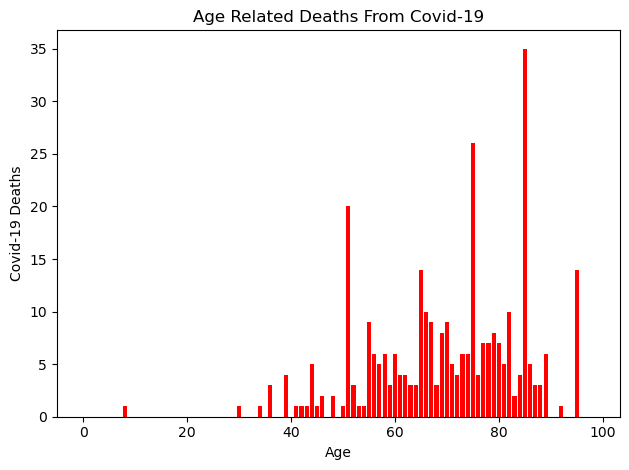

<Figure size 640x480 with 0 Axes>

In [171]:
plt.bar(age_outcome_count['age'], age_outcome_count['outcomes'], color='red')
plt.xlabel('Age')
plt.ylabel('Covid-19 Deaths')
plt.title('Age Related Deaths From Covid-19')
plt.tight_layout()
plt.show()
plt.savefig('Covid-19 Deaths By Age')

In [172]:
#how many 51 year old outcomes involved comorbilities
Outcome_comorbility_51_years = comorbidity_df[comorbidity_df['age'] == 51].sort_values(by='age', ascending=False).sum()
print(Outcome_comorbility_51_years)


sex                   115.0
age                  4692.0
hypertension            1.0
cardiovascular          0.0
cerebrovascular         0.0
lung                    0.0
malignancy              0.0
diabetes                0.0
liver                   0.0
kidney                  0.0
neurodegeneretive       0.0
infectious              1.0
surgical                0.0
copd                    1.0
asthma                  0.0
outcomes               20.0
dtype: float64


In [173]:
#population of 51 year olds
age_51_rows = comorbidity_df[comorbidity_df['age'] == 51]
age_51_rows

,sex,age,hypertension,cardiovascular,cerebrovascular,lung,malignancy,diabetes,liver,kidney,neurodegeneretive,infectious,surgical,copd,asthma,outcomes
6,1,51.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,2,51.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9,1,51.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
10,1,51.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
11,1,51.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,2,51.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
976,2,51.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1073,1,51.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1134,2,51.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


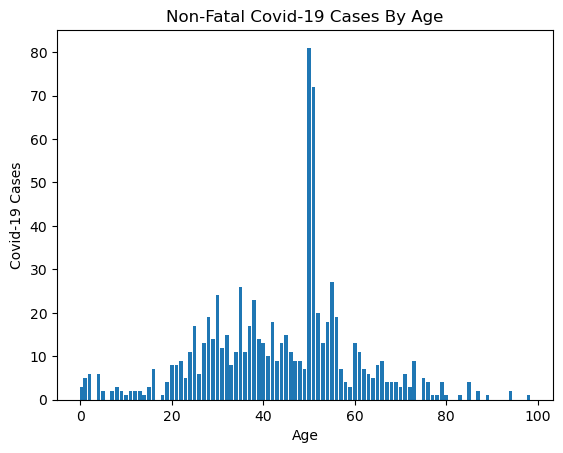

In [174]:
age_outcome_count2 = comorbidity_df[comorbidity_df['outcomes'] == 0].groupby('age').size()
plt.bar(age_outcome_count2.index, age_outcome_count2.values)
plt.xlabel('Age')
plt.ylabel('Covid-19 Cases')
plt.title('Non-Fatal Covid-19 Cases By Age')
plt.show()

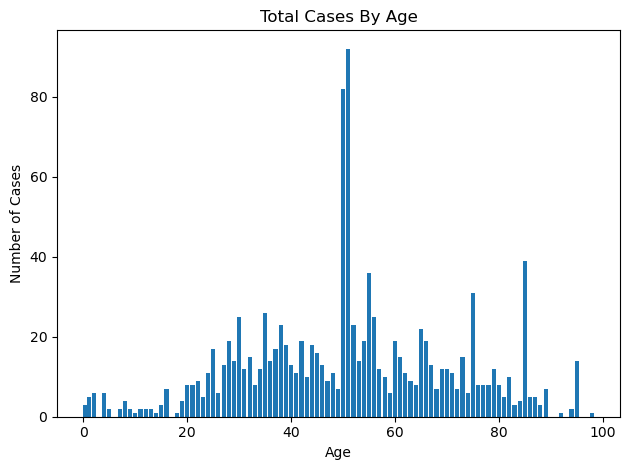

<Figure size 640x480 with 0 Axes>

In [175]:
Total_population = comorbidity_df[comorbidity_df['outcomes'] >= 0].groupby('age').size()
plt.bar(Total_population.index, Total_population.values)
plt.xlabel('Age')
plt.ylabel('Number of Cases')
plt.title('Total Cases By Age')
plt.tight_layout()
plt.show()
plt.savefig('Total Cases By Age')

In [176]:
highest_death_age = comorbidity_df[(comorbidity_df['age'] ==85) & (comorbidity_df['outcomes'] ==1)][['age', 'outcomes']]

In [177]:
highest_death_age.value_counts()

age   outcomes
85.0  1           35
Name: count, dtype: int64

In [178]:
death_rate_75 = comorbidity_df[(comorbidity_df['age'] ==75) & (comorbidity_df['outcomes'] ==1)][['age', 'outcomes']]

In [179]:
death_rate_75.value_counts()

age   outcomes
75.0  1           26
Name: count, dtype: int64

In [180]:
death_rate_51 = comorbidity_df[(comorbidity_df['age'] ==51) & (comorbidity_df['outcomes'] ==1)][['age', 'outcomes']]

In [181]:
death_rate_51.value_counts()

age   outcomes
51.0  1           20
Name: count, dtype: int64

In [182]:
healthy_deaths = comorbidity_df[(comorbidity_df['outcomes'] == 1) & (comorbidity_df.iloc[:, 2:14].sum(axis=1) == 0)]

In [183]:
healthy_deaths.count()

sex                  219
age                  219
hypertension         219
cardiovascular       219
cerebrovascular      219
lung                 219
malignancy           219
diabetes             219
liver                219
kidney               219
neurodegeneretive    219
infectious           219
surgical             219
copd                 219
asthma               219
outcomes             219
dtype: int64

In [184]:
Comor_deaths_age_51 = comorbidity_df[
    (comorbidity_df['outcomes'] == 1) & 
    (comorbidity_df.iloc[:, 2:14].sum(axis=1) == 1) & 
    (comorbidity_df['age'] == 78)
]
Comor_deaths_age_51.count()

sex                  4
age                  4
hypertension         4
cardiovascular       4
cerebrovascular      4
lung                 4
malignancy           4
diabetes             4
liver                4
kidney               4
neurodegeneretive    4
infectious           4
surgical             4
copd                 4
asthma               4
outcomes             4
dtype: int64